Because of the politics of its' construction,  Route 33 passes through relatively economically disadvantaged areas, and Route 33 disrupted communities in ways that were not positive.

Test the hypothesis that individuals living closer to Rt. 33 are likely to be less wealthy than average for the city.

There might be many ways to do this,   we will try to use data from Open Data Buffalo and geopandas to address the question.  

Here's the idea- find the census blocks that are close (say 300 feet) from the Kensington Expressway (Rt 33).   Then find the average household income for the census blocks close to the 33 from the 2017 census data on open data Buffalo.


a.) Extract the geo data about route 33 from the Roads and Highways data set

b.) Convert it to a CRS based on feet, not lat/long

c.) Add a buffer of 300 feet  around route 33 in the data set.  You may have to increase the buffer size, but we'll see.

d.) Find the boundaries of each census block

e.) Find out which census blocks overlap with your buffer around 33

f.) Plot a map that shows the census blocks,  rt 33 and the buffer around rt 33

g.) Find the median incomes for each census block.    Use an F or t-test to find out if the median income of families in census blocks touching the 33 are statistically significantly different from the median incomes of families in census blocks not touching the 33.     You will need to find a python implementation of an F test or t-test to do this.

In [1]:
import geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# a.) Extract the geo data about route 33 from the Roads and Highways data set

In [43]:
infile="Highways_and_Roadways.csv"

roads=pd.read_csv(infile)
roads.head()

,the_geom,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength()
0,MULTILINESTRING ((-78.862643159841 42.93182848...,4760,600058501.0,NaN,NaN,NaN,NaN,Unnamed Street,NaN,14.0,A70,6.0,15.0,14214.0,14214.0,97.321472
1,MULTILINESTRING ((-78.845214165985 42.87086246...,10718,477797294.0,316.0,370.0,317.0,369.0,Smith Street,NaN,12.0,A31,4.0,35.0,14210.0,14210.0,90.442701
2,MULTILINESTRING ((-78.827217182418 42.86574050...,11117,477798597.0,22.0,98.0,23.0,99.0,James P Coppola,NaN,12.0,A30,4.0,35.0,14210.0,14210.0,205.953960
3,MULTILINESTRING ((-78.804619308533 42.86063097...,557,477799268.0,248.0,308.0,NaN,NaN,Mineral Springs Road,NaN,12.0,A35,4.0,35.0,14210.0,14210.0,162.831183
4,MULTILINESTRING ((-78.868159186902 42.94568050...,3403,477776677.0,98.0,98.0,99.0,99.0,Tioga Street,NaN,12.0,A41,5.0,25.0,14216.0,14216.0,4.250600


In [63]:
roads2=geopandas.read_file(infile)

In [65]:
roads2 = roads2.set_crs(epsg = 4326)

In [69]:
roads2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
roads2["HighwayNumber"].unique()


array(['', '16', '954D', '190', '384', '62', '951K', '33', '5', '198',
       '266', '954L', '307', '354', '951J', '130', '265', '550', '955B',
       '950M', '950K', '201', '109', '951L', '315', '189', '952G', '952Q',
       '129'], dtype=object)

There is the beloved 33

In [71]:
roads2['geometry'] = geopandas.GeoSeries.from_wkt(roads2['the_geom'])

In [72]:
roads2.geometry.name

'geometry'

In [73]:
roads2=roads2.drop('the_geom',axis=1)

In [74]:
roads2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [75]:
roads2.geometry.name

'geometry'

In [76]:
roads2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#b.) Convert it to a CRS based on feet, not lat/long

 in feet, with a EPSG of 2263

In [77]:
roads2=roads2.to_crs('EPSG:2263')

roads2.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [78]:
roads3 = roads2.to_crs(epsg=2263)

In [79]:
roads3.crs



<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [80]:
roads3

,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry
0,4760,600058501,,,,,Unnamed Street,,14,A70,6,15,14214,14214,97.321471927093,"MULTILINESTRING ((-318243.100 1043910.939, -31..."
1,10718,477797294,316,370,317,369,Smith Street,,12,A31,4,35,14210,14210,90.442700644886571,"MULTILINESTRING ((-314808.611 1021451.710, -31..."
2,11117,477798597,22,98,23,99,James P Coppola,,12,A30,4,35,14210,14210,205.95396010793684,"MULTILINESTRING ((-310091.189 1019320.199, -31..."
3,557,477799268,248,308,,,Mineral Springs Road,,12,A35,4,35,14210,14210,162.83118260894148,"MULTILINESTRING ((-304140.176 1017126.463, -30..."
4,3403,477776677,98,98,99,99,Tioga Street,,12,A41,5,25,14216,14216,4.250599957696331,"MULTILINESTRING ((-319438.466 1049037.246, -31..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12058,9429,477781542,1600,1612,1601,1615,Niagara Street,266,01,A31,3,35,14213,14213,24.186138591728263,"MULTILINESTRING ((-327645.414 1043257.993, -32..."
12059,8131,477789551,790,810,789,809,Ellicott Street,,12,A31,4,35,14203,14203,67.144013135697548,"MULTILINESTRING ((-320166.572 1032304.715, -32..."
12060,6190,477788289,422,446,417,449,Best Street,,12,A31,4,35,14208,14211,102.2518210106723,"MULTILINESTRING ((-316154.401 1033567.043, -31..."
12061,11209,477798616,134,198,135,199,Lee Street,,12,A41,5,25,14210,14210,230.18875698862857,"MULTILINESTRING ((-314115.984 1019519.547, -31..."


#c.) Add a buffer of 300 feet around route 33 in the data set. You may have to increase the buffer size, but we'll see.

In [81]:

#roads2["buffer_33"]=roads2[roads2['HighwayNumber']=="33"].buffer(.003)

the33 = roads2.query('HighwayNumber=="33"')
the33
the33Buffer = the33.buffer(300)

In [82]:
the33Buffer


27       POLYGON ((-314993.780 1031876.547, -315009.172...
158      POLYGON ((-313539.516 1040260.354, -313533.275...
275      POLYGON ((-313665.982 1039262.850, -313662.914...
292      POLYGON ((-314551.993 1032344.849, -314570.281...
460      POLYGON ((-316249.947 1031807.601, -316191.211...
                               ...                        
11754    POLYGON ((-312992.555 1039874.595, -313009.143...
11854    POLYGON ((-316058.823 1031923.324, -316032.938...
11878    POLYGON ((-320749.301 1030131.729, -320669.184...
11889    POLYGON ((-314336.564 1034150.596, -314322.573...
11904    POLYGON ((-302939.195 1043228.242, -303207.193...
Length: 171, dtype: geometry

In [83]:
roads2.dtypes

OBJECTID                object
NYSStreetID             object
LeftFromAddress         object
LeftToAddress           object
RightFromAddress        object
RightToAddress          object
CompleteStreetName      object
HighwayNumber           object
Jurisdiction            object
FCC                     object
ACC                     object
SPEED                   object
LeftPostal              object
RightPostal             object
Shape.STLength()        object
geometry              geometry
dtype: object

#d.) Find the boundaries of each census block

In [113]:
infile2="/content/Census_Tracts_2020.csv"
cencusData=geopandas.read_file(infile2)
cencusData.head()

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,the_geom,OBJECTID,geometry
0,36,029,004003,36029004003,40.03,Census Tract,G5020,S,890101,0,+42.9354233,-078.8338819,MULTIPOLYGON (((-78.83926514923 42.93133848177...,37,None
1,36,029,000900,36029000900,9,Census Tract,G5020,S,549188,0,+42.8539069,-078.8165216,MULTIPOLYGON (((-78.823623137997 42.8563174690...,7,None
2,36,029,003501,36029003501,35.01,Census Tract,G5020,S,680915,0,+42.9088219,-078.8294903,MULTIPOLYGON (((-78.835842145396 42.9037854770...,30,None
3,36,029,005500,36029005500,55,Census Tract,G5020,S,1559835,0,+42.9388805,-078.8889408,MULTIPOLYGON (((-78.898815168213 42.9364124801...,56,None
4,36,029,004901,36029004901,49.01,Census Tract,G5020,S,258659,0,+42.9457704,-078.8601229,MULTIPOLYGON (((-78.868149159609 42.9446304824...,48,None


In [114]:
cencusData = cencusData.set_crs(epsg = 4326)

In [115]:
cencusData["geometry"] = geopandas.GeoSeries.from_wkt(cencusData['the_geom'])

In [117]:
cencusData.geometry

0     MULTIPOLYGON (((-78.83927 42.93134, -78.83926 ...
1     MULTIPOLYGON (((-78.82362 42.85632, -78.82353 ...
2     MULTIPOLYGON (((-78.83584 42.90379, -78.83584 ...
3     MULTIPOLYGON (((-78.89882 42.93641, -78.89846 ...
4     MULTIPOLYGON (((-78.86815 42.94463, -78.86798 ...
                            ...                        
86    MULTIPOLYGON (((-78.90760 42.94566, -78.90716 ...
87    MULTIPOLYGON (((-78.91401 42.94249, -78.90919 ...
88    MULTIPOLYGON (((-78.88817 42.91497, -78.88739 ...
89    MULTIPOLYGON (((-78.82894 42.90656, -78.82830 ...
90    MULTIPOLYGON (((-78.83835 42.95689, -78.83832 ...
Name: geometry, Length: 91, dtype: geometry

In [118]:
cencusData.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [119]:
cencusData=cencusData.to_crs('EPSG:2263')

cencusData.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [120]:
cencusData.geometry

0     MULTIPOLYGON (((-311997.390 1043385.727, -3119...
1     MULTIPOLYGON (((-309317.616 1015835.813, -3092...
2     MULTIPOLYGON (((-311635.903 1033301.580, -3116...
3     MULTIPOLYGON (((-327828.512 1046120.016, -3277...
4     MULTIPOLYGON (((-319457.056 1048654.726, -3194...
                            ...                        
86    MULTIPOLYGON (((-329990.085 1049620.048, -3298...
87    MULTIPOLYGON (((-331770.057 1048560.142, -3304...
88    MULTIPOLYGON (((-325416.994 1038153.901, -3251...
89    MULTIPOLYGON (((-309731.626 1034210.386, -3095...
90    MULTIPOLYGON (((-311238.090 1052676.852, -3112...
Name: geometry, Length: 91, dtype: geometry

In [121]:
cencusData.head()

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,the_geom,OBJECTID,geometry
0,36,029,004003,36029004003,40.03,Census Tract,G5020,S,890101,0,+42.9354233,-078.8338819,MULTIPOLYGON (((-78.83926514923 42.93133848177...,37,"MULTIPOLYGON (((-311997.390 1043385.727, -3119..."
1,36,029,000900,36029000900,9,Census Tract,G5020,S,549188,0,+42.8539069,-078.8165216,MULTIPOLYGON (((-78.823623137997 42.8563174690...,7,"MULTIPOLYGON (((-309317.616 1015835.813, -3092..."
2,36,029,003501,36029003501,35.01,Census Tract,G5020,S,680915,0,+42.9088219,-078.8294903,MULTIPOLYGON (((-78.835842145396 42.9037854770...,30,"MULTIPOLYGON (((-311635.903 1033301.580, -3116..."
3,36,029,005500,36029005500,55,Census Tract,G5020,S,1559835,0,+42.9388805,-078.8889408,MULTIPOLYGON (((-78.898815168213 42.9364124801...,56,"MULTIPOLYGON (((-327828.512 1046120.016, -3277..."
4,36,029,004901,36029004901,49.01,Census Tract,G5020,S,258659,0,+42.9457704,-078.8601229,MULTIPOLYGON (((-78.868149159609 42.9446304824...,48,"MULTIPOLYGON (((-319457.056 1048654.726, -3194..."


In [122]:
cencusData['OBJECTID'].unique()

array(['37', '7', '30', '56', '48', '13', '53', '64', '39', '87', '27',
       '4', '31', '3', '70', '79', '83', '41', '5', '77', '9', '59', '45',
       '20', '38', '18', '62', '33', '90', '78', '81', '86', '63', '50',
       '65', '32', '52', '91', '84', '2', '34', '21', '47', '35', '75',
       '46', '12', '49', '67', '15', '25', '26', '85', '54', '28', '6',
       '23', '76', '36', '69', '80', '40', '88', '60', '55', '10', '72',
       '68', '16', '22', '51', '42', '89', '71', '14', '29', '73', '19',
       '57', '82', '1', '74', '8', '11', '43', '17', '58', '61', '66',
       '24', '44'], dtype=object)

In [123]:
cencusData["boundary"]=cencusData.boundary

<Axes: >

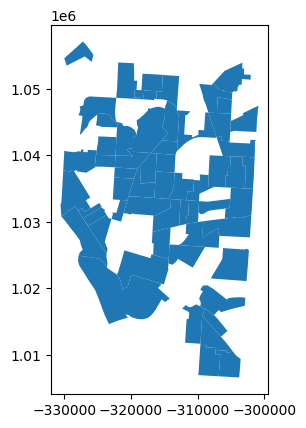

In [124]:
cencusData['geometry'].iloc[1:60].plot()

#e.) Find out which census blocks overlap with your buffer around 33

In [125]:
#cencusData=cencusData.set_crs('EPSG:2263')

cencusData.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [126]:
the33Buffer

27       POLYGON ((-314993.780 1031876.547, -315009.172...
158      POLYGON ((-313539.516 1040260.354, -313533.275...
275      POLYGON ((-313665.982 1039262.850, -313662.914...
292      POLYGON ((-314551.993 1032344.849, -314570.281...
460      POLYGON ((-316249.947 1031807.601, -316191.211...
                               ...                        
11754    POLYGON ((-312992.555 1039874.595, -313009.143...
11854    POLYGON ((-316058.823 1031923.324, -316032.938...
11878    POLYGON ((-320749.301 1030131.729, -320669.184...
11889    POLYGON ((-314336.564 1034150.596, -314322.573...
11904    POLYGON ((-302939.195 1043228.242, -303207.193...
Length: 171, dtype: geometry

In [127]:
buffered33Set = roads2

In [128]:
len(the33Buffer)

171

In [129]:
buffered33Set["geometry"] = the33Buffer

In [130]:
buffered33Set

,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry
0,4760,600058501,,,,,Unnamed Street,,14,A70,6,15,14214,14214,97.321471927093,None
1,10718,477797294,316,370,317,369,Smith Street,,12,A31,4,35,14210,14210,90.442700644886571,None
2,11117,477798597,22,98,23,99,James P Coppola,,12,A30,4,35,14210,14210,205.95396010793684,None
3,557,477799268,248,308,,,Mineral Springs Road,,12,A35,4,35,14210,14210,162.83118260894148,None
4,3403,477776677,98,98,99,99,Tioga Street,,12,A41,5,25,14216,14216,4.250599957696331,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12058,9429,477781542,1600,1612,1601,1615,Niagara Street,266,01,A31,3,35,14213,14213,24.186138591728263,None
12059,8131,477789551,790,810,789,809,Ellicott Street,,12,A31,4,35,14203,14203,67.144013135697548,None
12060,6190,477788289,422,446,417,449,Best Street,,12,A31,4,35,14208,14211,102.2518210106723,None
12061,11209,477798616,134,198,135,199,Lee Street,,12,A41,5,25,14210,14210,230.18875698862857,None


In [131]:
#ax=roads2.plot( color='k',figsize=(16,16),linewidth=0.25)
#the33Buffer.plot(ax=ax,color='r',edgecolor='black')

#cencusData["boundary"].plot(ax=ax, alpha=.8)


In [132]:
roads2

,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry
0,4760,600058501,,,,,Unnamed Street,,14,A70,6,15,14214,14214,97.321471927093,None
1,10718,477797294,316,370,317,369,Smith Street,,12,A31,4,35,14210,14210,90.442700644886571,None
2,11117,477798597,22,98,23,99,James P Coppola,,12,A30,4,35,14210,14210,205.95396010793684,None
3,557,477799268,248,308,,,Mineral Springs Road,,12,A35,4,35,14210,14210,162.83118260894148,None
4,3403,477776677,98,98,99,99,Tioga Street,,12,A41,5,25,14216,14216,4.250599957696331,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12058,9429,477781542,1600,1612,1601,1615,Niagara Street,266,01,A31,3,35,14213,14213,24.186138591728263,None
12059,8131,477789551,790,810,789,809,Ellicott Street,,12,A31,4,35,14203,14203,67.144013135697548,None
12060,6190,477788289,422,446,417,449,Best Street,,12,A31,4,35,14208,14211,102.2518210106723,None
12061,11209,477798616,134,198,135,199,Lee Street,,12,A41,5,25,14210,14210,230.18875698862857,None


In [133]:
#mmm well it changes the roads two after i created the buffered33 set wild,

In [134]:
buffered33Set=buffered33Set[buffered33Set['HighwayNumber']=='33']
buffered33Set

,OBJECTID,NYSStreetID,LeftFromAddress,LeftToAddress,RightFromAddress,RightToAddress,CompleteStreetName,HighwayNumber,Jurisdiction,FCC,ACC,SPEED,LeftPostal,RightPostal,Shape.STLength(),geometry
27,6881,477789711,,,,,State Route 33,33,01,A15,2,65,14211,14211,182.11687756807135,"POLYGON ((-314993.780 1031876.547, -315009.172..."
158,5670,477783413,,,,,State Route 33,33,01,A15,2,65,14214,14214,31.772199666332554,"POLYGON ((-313539.516 1040260.354, -313533.275..."
275,5700,477784190,,,,,State Route 33,33,01,A15,2,65,14214,14214,19.680589422217544,"POLYGON ((-313665.982 1039262.850, -313662.914..."
292,6212,477789175,,,,,State Route 33,33,01,A15,2,65,14211,14211,38.717733662392163,"POLYGON ((-314551.993 1032344.849, -314570.281..."
460,6859,516218529,,,,,State Route 33,33,01,A15,2,65,14211,14211,86.471009330646396,"POLYGON ((-316249.947 1031807.601, -316191.211..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11754,5721,516218747,,,,,State Route 33,33,01,A15,2,65,14214,14214,123.44060174205191,"POLYGON ((-312992.555 1039874.595, -313009.143..."
11854,6861,477789885,,,,,State Route 33,33,01,A15,2,65,14211,14211,47.577214084038857,"POLYGON ((-316058.823 1031923.324, -316032.938..."
11878,8090,477791579,54,98,101,101,East Tupper Street,33,01,A31,3,35,14203,14203,112.49947185689308,"POLYGON ((-320749.301 1030131.729, -320669.184..."
11889,6239,477788277,,,,,State Route 33,33,01,A15,2,65,14208,14211,187.70617171576794,"POLYGON ((-314336.564 1034150.596, -314322.573..."


In [135]:
cencusData.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [136]:
cencusData.head()

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,the_geom,OBJECTID,geometry,boundary
0,36,029,004003,36029004003,40.03,Census Tract,G5020,S,890101,0,+42.9354233,-078.8338819,MULTIPOLYGON (((-78.83926514923 42.93133848177...,37,"MULTIPOLYGON (((-311997.390 1043385.727, -3119...","MULTILINESTRING ((-311997.390 1043385.727, -31..."
1,36,029,000900,36029000900,9,Census Tract,G5020,S,549188,0,+42.8539069,-078.8165216,MULTIPOLYGON (((-78.823623137997 42.8563174690...,7,"MULTIPOLYGON (((-309317.616 1015835.813, -3092...","MULTILINESTRING ((-309317.616 1015835.813, -30..."
2,36,029,003501,36029003501,35.01,Census Tract,G5020,S,680915,0,+42.9088219,-078.8294903,MULTIPOLYGON (((-78.835842145396 42.9037854770...,30,"MULTIPOLYGON (((-311635.903 1033301.580, -3116...","MULTILINESTRING ((-311635.903 1033301.580, -31..."
3,36,029,005500,36029005500,55,Census Tract,G5020,S,1559835,0,+42.9388805,-078.8889408,MULTIPOLYGON (((-78.898815168213 42.9364124801...,56,"MULTIPOLYGON (((-327828.512 1046120.016, -3277...","MULTILINESTRING ((-327828.512 1046120.016, -32..."
4,36,029,004901,36029004901,49.01,Census Tract,G5020,S,258659,0,+42.9457704,-078.8601229,MULTIPOLYGON (((-78.868149159609 42.9446304824...,48,"MULTIPOLYGON (((-319457.056 1048654.726, -3194...","MULTILINESTRING ((-319457.056 1048654.726, -31..."


In [140]:
cencusData2 = cencusData
cencusData2 = cencusData2.drop('geometry',axis=1)
cencusData2['geometry'] = cencusData2['boundary']

In [141]:
block33 = geopandas.sjoin(cencusData2, buffered33Set,  how='inner', op='intersects')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [142]:
block33.dtypes

STATEFP20               object
COUNTYFP20              object
TRACTCE20               object
GEOID20                 object
NAME20                  object
NAMELSAD20              object
MTFCC20                 object
FUNCSTAT20              object
ALAND20                 object
AWATER20                object
INTPTLAT20              object
INTPTLON20              object
the_geom                object
OBJECTID_left           object
boundary              geometry
geometry              geometry
index_right              int64
OBJECTID_right          object
NYSStreetID             object
LeftFromAddress         object
LeftToAddress           object
RightFromAddress        object
RightToAddress          object
CompleteStreetName      object
HighwayNumber           object
Jurisdiction            object
FCC                     object
ACC                     object
SPEED                   object
LeftPostal              object
RightPostal             object
Shape.STLength()        object
dtype: o

In [143]:
block33['RightPostal'].unique()

array(['14214', '14215', '14211', '14208', '14204', '14203'], dtype=object)

In [144]:
roads2['RightPostal'].unique()

array(['14214', '14210', '14216', '14202', '14207', '14203', '14220',
       '14204', '14208', '14213', '14226', '14218', '', '14211', '14215',
       '14206', '14212', '14209', '14222', '14201', '14223', '14217',
       '14225', '14224'], dtype=object)

In [145]:
touchingBlocks= block33['boundary'].drop_duplicates()

In [146]:
len(touchingBlocks)

17

<Axes: >

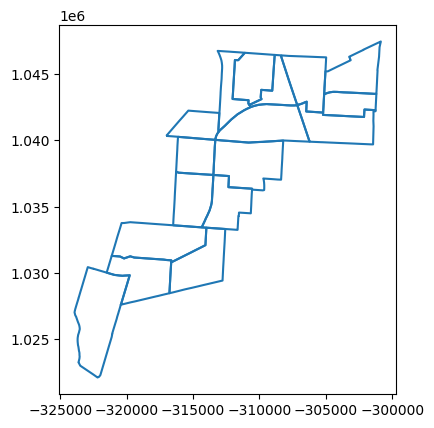

In [147]:
touchingBlocks.plot()

<Axes: >

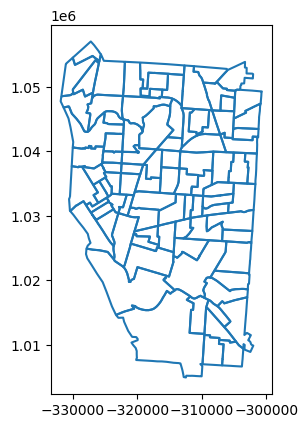

In [148]:
cencusData["boundary"].plot()

In [149]:
len(cencusData["boundary"])

91

# There it is. The answer

#f.) Plot a map that shows the census blocks, rt 33 and the buffer around rt 33

<Axes: >

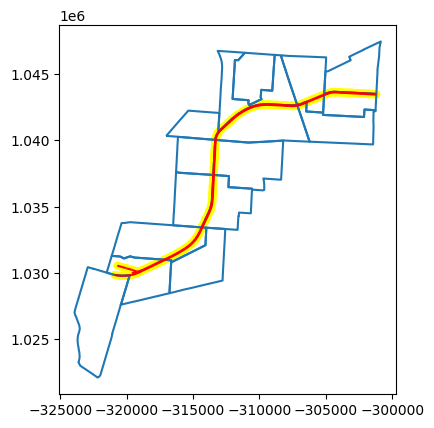

In [150]:
#ax = block33['boundary'].plot()
ax = touchingBlocks.plot()
buffered33Set["geometry"].plot(ax=ax,color = "yellow")
the33.plot(ax=ax,color = "red")

###g.) Find the median incomes for each census block. Use an F or t-test to find out if the median income of families in census blocks touching the 33 are statistically significantly different from the median incomes of families in census blocks not touching the 33. You will need to find a python implementation of an F test or t-test to do this

To find the median income I am going to need the census data as well as the income data.

In [151]:
list(cencusData["boundary"].index)
touchingBlocks.index
theKey=np.isin(list(cencusData["boundary"].index),touchingBlocks.index)
notTouch33= cencusData["boundary"].iloc[~theKey]
#len(notTouch33)
notTouch33
touchingBlocks
len(touchingBlocks)+len(notTouch33)

91

In [152]:
cencusData

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,the_geom,OBJECTID,geometry,boundary
0,36,029,004003,36029004003,40.03,Census Tract,G5020,S,890101,0,+42.9354233,-078.8338819,MULTIPOLYGON (((-78.83926514923 42.93133848177...,37,"MULTIPOLYGON (((-311997.390 1043385.727, -3119...","MULTILINESTRING ((-311997.390 1043385.727, -31..."
1,36,029,000900,36029000900,9,Census Tract,G5020,S,549188,0,+42.8539069,-078.8165216,MULTIPOLYGON (((-78.823623137997 42.8563174690...,7,"MULTIPOLYGON (((-309317.616 1015835.813, -3092...","MULTILINESTRING ((-309317.616 1015835.813, -30..."
2,36,029,003501,36029003501,35.01,Census Tract,G5020,S,680915,0,+42.9088219,-078.8294903,MULTIPOLYGON (((-78.835842145396 42.9037854770...,30,"MULTIPOLYGON (((-311635.903 1033301.580, -3116...","MULTILINESTRING ((-311635.903 1033301.580, -31..."
3,36,029,005500,36029005500,55,Census Tract,G5020,S,1559835,0,+42.9388805,-078.8889408,MULTIPOLYGON (((-78.898815168213 42.9364124801...,56,"MULTIPOLYGON (((-327828.512 1046120.016, -3277...","MULTILINESTRING ((-327828.512 1046120.016, -32..."
4,36,029,004901,36029004901,49.01,Census Tract,G5020,S,258659,0,+42.9457704,-078.8601229,MULTIPOLYGON (((-78.868149159609 42.9446304824...,48,"MULTIPOLYGON (((-319457.056 1048654.726, -3194...","MULTILINESTRING ((-319457.056 1048654.726, -31..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,36,029,005700,36029005700,57,Census Tract,G5020,S,956845,0,+42.9497231,-078.8992508,MULTIPOLYGON (((-78.9076001722 42.945662480846...,58,"MULTIPOLYGON (((-329990.085 1049620.048, -3298...","MULTILINESTRING ((-329990.085 1049620.048, -32..."
87,36,029,005900,36029005900,59,Census Tract,G5020,S,1217883,297447,+42.9373135,-078.9031215,MULTIPOLYGON (((-78.914011173742 42.9424874801...,61,"MULTIPOLYGON (((-331770.057 1048560.142, -3304...","MULTILINESTRING ((-331770.057 1048560.142, -33..."
88,36,029,006601,36029006601,66.01,Census Tract,G5020,S,392015,0,+42.9134654,-078.8822804,MULTIPOLYGON (((-78.888172163282 42.9149734764...,66,"MULTIPOLYGON (((-325416.994 1038153.901, -3251...","MULTILINESTRING ((-325416.994 1038153.901, -32..."
89,36,029,002900,36029002900,29,Census Tract,G5020,S,777409,0,+42.9066274,-078.8198651,MULTIPOLYGON (((-78.828937144264 42.9065614773...,24,"MULTIPOLYGON (((-309731.626 1034210.386, -3095...","MULTILINESTRING ((-309731.626 1034210.386, -30..."


In [156]:
#Import the income data
infile3="/content/ACS_2017_Data_Profile_5_Year_Estimates__Erie_County_-_Census_Tract_20240401.csv"

dataProf=geopandas.read_file(infile3)


In [158]:
dataProf.crs

In [159]:
dataProf = dataProf.set_crs(epsg = 4326)

In [160]:
dataProf['geometry'] = geopandas.GeoSeries.from_wkt(dataProf['Location'])

In [161]:
dataProf

,GEO.display.label.Geography,GEO.id2.Id2,HC01_VC03.Estimate..HOUSEHOLDS.BY.TYPE...Total.households,HC01_VC04.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families.,HC01_VC05.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....With.own.children.of.the.householder.under.18.years,HC01_VC06.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family,HC01_VC07.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family...With.own.children.of.the.householder.under.18.years,HC01_VC08.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family,HC01_VC09.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family...With.own.children.of.the.householder.under.18.years,HC01_VC10.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Female.householder..no.husband.present..family,...,HC01_VC104.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Some.other.race.alone,HC01_VC105.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Two.or.more.races,HC01_VC106.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Two.or.more.races...Two.races.including.Some.other.race,HC01_VC107.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.population...Not.Hispanic.or.Latino...Two.or.more.races...Two.races.excluding.Some.other.race..and.Three.or.more.races,HC01_VC109.Estimate..HISPANIC.OR.LATINO.AND.RACE...Total.housing.units,HC01_VC113.Estimate..CITIZEN..VOTING.AGE.POPULATION...Citizen..18.and.over.population,HC01_VC114.Estimate..CITIZEN..VOTING.AGE.POPULATION...Citizen..18.and.over.population...Male,HC01_VC115.Estimate..CITIZEN..VOTING.AGE.POPULATION...Citizen..18.and.over.population...Female,Location,geometry
0,"Census Tract 9900, Erie County, New York",36029990000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,POINT (-78.86383129022715 42.83370964619451),POINT (-78.86383 42.83371)
1,"Census Tract 72.02, Erie County, New York",36029007202,968,455,212,219,55,41,25,195,...,18,5,0,5,1048,1425,692,733,POINT (-78.89200971828663 42.888934),POINT (-78.89201 42.88893)
2,"Census Tract 108.05, Erie County, New York",36029010805,2144,1266,386,1041,305,101,52,124,...,0,53,0,53,2144,4085,2055,2030,POINT (-78.70926668450177 42.8726015),POINT (-78.70927 42.87260)
3,"Census Tract 91.04, Erie County, New York",36029009104,1704,1251,506,1054,435,102,45,95,...,16,84,0,84,1719,3284,1557,1727,POINT (-78.75412065894162 42.9853335),POINT (-78.75412 42.98533)
4,"Census Tract 9400, Erie County, New York",36029940000,785,460,185,202,43,64,30,194,...,28,133,0,133,926,1402,606,796,POINT (-78.96774988447652 42.5279365),POINT (-78.96775 42.52794)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,"Census Tract 80.03, Erie County, New York",36029008003,2196,1220,383,879,232,178,57,163,...,0,104,14,90,2333,3990,1788,2202,POINT (-78.83175526013395 42.9636025),POINT (-78.83176 42.96360)
233,"Census Tract 157, Erie County, New York",36029015700,1293,927,330,761,290,54,13,112,...,0,35,0,35,1373,2584,1298,1286,POINT (-78.86355308731274 42.5703995),POINT (-78.86355 42.57040)
234,"Census Tract 165, Erie County, New York",36029016500,711,241,56,129,0,5,0,107,...,0,32,0,32,926,1486,913,573,POINT (-78.8740711109348 42.8831645),POINT (-78.87407 42.88316)
235,"Census Tract 175.01, Erie County, New York",36029017501,677,379,173,202,61,43,19,134,...,4,105,0,105,718,1138,478,660,POINT (-78.92004894094771 42.4794565),POINT (-78.92005 42.47946)


In [162]:
dataProf = dataProf.to_crs('EPSG:2263')
cencusData2 = cencusData2.to_crs('EPSG:2263')

<Axes: >

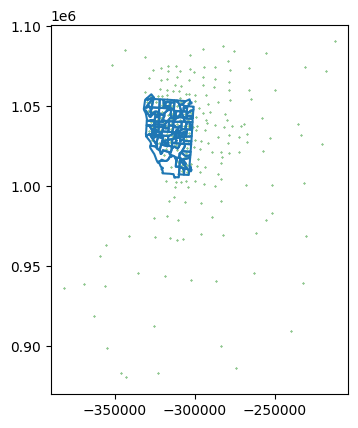

In [163]:
ax=cencusData['boundary'].plot()
dataProf['geometry'].plot(ax=ax, color="green",markersize =.1)

In [164]:
dataProf['geometry'].intersects(cencusData2['geometry']).unique()

/usr/local/lib/python3.10/dist-packages/geopandas/base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


array([False])

In [165]:
cencusData2

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,the_geom,OBJECTID,boundary,geometry
0,36,029,004003,36029004003,40.03,Census Tract,G5020,S,890101,0,+42.9354233,-078.8338819,MULTIPOLYGON (((-78.83926514923 42.93133848177...,37,"MULTILINESTRING ((-311997.390 1043385.727, -31...","MULTILINESTRING ((-311997.390 1043385.727, -31..."
1,36,029,000900,36029000900,9,Census Tract,G5020,S,549188,0,+42.8539069,-078.8165216,MULTIPOLYGON (((-78.823623137997 42.8563174690...,7,"MULTILINESTRING ((-309317.616 1015835.813, -30...","MULTILINESTRING ((-309317.616 1015835.813, -30..."
2,36,029,003501,36029003501,35.01,Census Tract,G5020,S,680915,0,+42.9088219,-078.8294903,MULTIPOLYGON (((-78.835842145396 42.9037854770...,30,"MULTILINESTRING ((-311635.903 1033301.580, -31...","MULTILINESTRING ((-311635.903 1033301.580, -31..."
3,36,029,005500,36029005500,55,Census Tract,G5020,S,1559835,0,+42.9388805,-078.8889408,MULTIPOLYGON (((-78.898815168213 42.9364124801...,56,"MULTILINESTRING ((-327828.512 1046120.016, -32...","MULTILINESTRING ((-327828.512 1046120.016, -32..."
4,36,029,004901,36029004901,49.01,Census Tract,G5020,S,258659,0,+42.9457704,-078.8601229,MULTIPOLYGON (((-78.868149159609 42.9446304824...,48,"MULTILINESTRING ((-319457.056 1048654.726, -31...","MULTILINESTRING ((-319457.056 1048654.726, -31..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,36,029,005700,36029005700,57,Census Tract,G5020,S,956845,0,+42.9497231,-078.8992508,MULTIPOLYGON (((-78.9076001722 42.945662480846...,58,"MULTILINESTRING ((-329990.085 1049620.048, -32...","MULTILINESTRING ((-329990.085 1049620.048, -32..."
87,36,029,005900,36029005900,59,Census Tract,G5020,S,1217883,297447,+42.9373135,-078.9031215,MULTIPOLYGON (((-78.914011173742 42.9424874801...,61,"MULTILINESTRING ((-331770.057 1048560.142, -33...","MULTILINESTRING ((-331770.057 1048560.142, -33..."
88,36,029,006601,36029006601,66.01,Census Tract,G5020,S,392015,0,+42.9134654,-078.8822804,MULTIPOLYGON (((-78.888172163282 42.9149734764...,66,"MULTILINESTRING ((-325416.994 1038153.901, -32...","MULTILINESTRING ((-325416.994 1038153.901, -32..."
89,36,029,002900,36029002900,29,Census Tract,G5020,S,777409,0,+42.9066274,-078.8198651,MULTIPOLYGON (((-78.828937144264 42.9065614773...,24,"MULTILINESTRING ((-309731.626 1034210.386, -30...","MULTILINESTRING ((-309731.626 1034210.386, -30..."


In [166]:
buffaloProfData = geopandas.sjoin(dataProf, cencusData, op='intersects')
buffaloProfData

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,GEO.display.label.Geography,GEO.id2.Id2,HC01_VC03.Estimate..HOUSEHOLDS.BY.TYPE...Total.households,HC01_VC04.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families.,HC01_VC05.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....With.own.children.of.the.householder.under.18.years,HC01_VC06.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family,HC01_VC07.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Married.couple.family...With.own.children.of.the.householder.under.18.years,HC01_VC08.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family,HC01_VC09.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Male.householder..no.wife.present..family...With.own.children.of.the.householder.under.18.years,HC01_VC10.Estimate..HOUSEHOLDS.BY.TYPE...Total.households...Family.households..families....Female.householder..no.husband.present..family,...,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,the_geom,OBJECTID,boundary
1,"Census Tract 72.02, Erie County, New York",36029007202,968,455,212,219,55,41,25,195,...,Census Tract,G5020,S,1024153,999315,+42.8915687,-078.8943415,MULTIPOLYGON (((-78.904614166907 42.8944294716...,79,"MULTILINESTRING ((-330236.923 1030919.381, -33..."
5,"Census Tract 1.10, Erie County, New York",36029000110,1003,717,293,446,203,112,40,159,...,Census Tract,G5020,S,8373929,1313301,+42.8474559,-078.8466675,MULTIPOLYGON (((-78.875386154261 42.8509314655...,1,"MULTILINESTRING ((-323294.088 1014643.126, -32..."
10,"Census Tract 8, Erie County, New York",36029000800,1885,1160,469,633,283,154,17,373,...,Census Tract,G5020,S,1090392,0,+42.8476264,-078.8171281,MULTIPOLYGON (((-78.82373213673 42.84497546645...,6,"MULTILINESTRING ((-309574.477 1011707.388, -30..."
13,"Census Tract 15, Erie County, New York",36029001500,662,325,153,96,0,31,20,198,...,Census Tract,G5020,S,956234,0,+42.8854677,-078.8484884,MULTIPOLYGON (((-78.853971150557 42.8897954734...,12,"MULTILINESTRING ((-316771.643 1028475.919, -31..."
14,"Census Tract 63.01, Erie County, New York",36029006301,2157,1074,516,695,256,135,88,244,...,Census Tract,G5020,S,723107,0,+42.9240064,-078.8822363,MULTIPOLYGON (((-78.887682163601 42.9220814773...,63,"MULTILINESTRING ((-325141.276 1040734.892, -32..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,"Census Tract 24, Erie County, New York",36029002400,1764,983,489,357,84,223,138,403,...,Census Tract,G5020,S,1669445,0,+42.8935965,-078.8112846,MULTIPOLYGON (((-78.825947142063 42.8948994753...,18,"MULTILINESTRING ((-309165.424 1029919.509, -30..."
225,"Census Tract 71.02, Erie County, New York",36029007102,1272,618,396,162,53,106,72,350,...,Census Tract,G5020,S,843932,0,+42.8891906,-078.8826878,MULTIPOLYGON (((-78.89242416285 42.89303147223...,76,"MULTILINESTRING ((-327001.740 1030227.626, -32..."
226,"Census Tract 67.02, Erie County, New York",36029006702,2215,195,50,163,18,0,0,32,...,Census Tract,G5020,S,791521,0,+42.9069813,-078.8722536,MULTIPOLYGON (((-78.877139159253 42.9058994750...,69,"MULTILINESTRING ((-322648.187 1034684.912, -32..."
230,"Census Tract 170, Erie County, New York",36029017000,1218,737,277,204,7,88,0,445,...,Census Tract,G5020,S,1417957,0,+42.9255190,-078.8296184,MULTIPOLYGON (((-78.843465150132 42.9221034794...,88,"MULTILINESTRING ((-313307.394 1040084.941, -31..."


Find the median incomes for each census block

Lets do it with ObjectID.

In [167]:
median_income_by_objectid = buffaloProfData.groupby('OBJECTID')['HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars.'].median()

In [168]:
median_income_by_objectid.index

Index(['1', '10', '12', '13', '15', '16', '17', '18', '19', '2', '21', '23',
       '24', '25', '26', '27', '28', '29', '3', '31', '32', '33', '34', '35',
       '37', '38', '39', '4', '40', '41', '42', '43', '44', '46', '47', '49',
       '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '71',
       '72', '74', '75', '76', '78', '79', '8', '80', '81', '82', '83', '84',
       '86', '87', '88', '89', '9', '90', '91'],
      dtype='object', name='OBJECTID')

In [169]:
median_income_by_objectid

OBJECTID
1     45745.0
10    27119.0
12    29225.0
13    20686.0
15    26806.0
       ...   
88    34602.0
89    24306.0
9     44531.0
90        0.0
91        0.0
Name: HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars., Length: 79, dtype: object

Use an F or t-test to find out if the median income of families in census blocks touching the 33 are statistically significantly different from the median incomes of families in census blocks not touching the 33.

Lets first get the the 2 census sets 1 thats touching the 33 and ones that are not

In [170]:
theKey

array([ True, False, False, False, False, False,  True, False,  True,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [171]:
touchingData = cencusData[theKey]
len(touchingData)

17

In [172]:
notTouchingData = cencusData[~theKey]
notTouchingData

,STATEFP20,COUNTYFP20,TRACTCE20,GEOID20,NAME20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,the_geom,OBJECTID,geometry,boundary
1,36,029,000900,36029000900,9,Census Tract,G5020,S,549188,0,+42.8539069,-078.8165216,MULTIPOLYGON (((-78.823623137997 42.8563174690...,7,"MULTIPOLYGON (((-309317.616 1015835.813, -3092...","MULTILINESTRING ((-309317.616 1015835.813, -30..."
2,36,029,003501,36029003501,35.01,Census Tract,G5020,S,680915,0,+42.9088219,-078.8294903,MULTIPOLYGON (((-78.835842145396 42.9037854770...,30,"MULTIPOLYGON (((-311635.903 1033301.580, -3116...","MULTILINESTRING ((-311635.903 1033301.580, -31..."
3,36,029,005500,36029005500,55,Census Tract,G5020,S,1559835,0,+42.9388805,-078.8889408,MULTIPOLYGON (((-78.898815168213 42.9364124801...,56,"MULTIPOLYGON (((-327828.512 1046120.016, -3277...","MULTILINESTRING ((-327828.512 1046120.016, -32..."
4,36,029,004901,36029004901,49.01,Census Tract,G5020,S,258659,0,+42.9457704,-078.8601229,MULTIPOLYGON (((-78.868149159609 42.9446304824...,48,"MULTIPOLYGON (((-319457.056 1048654.726, -3194...","MULTILINESTRING ((-319457.056 1048654.726, -31..."
5,36,029,001601,36029001601,16.01,Census Tract,G5020,S,1362133,0,+42.8889822,-078.8269589,"MULTIPOLYGON (((-78.8392391451 42.88501747322,...",13,"MULTIPOLYGON (((-312923.228 1026517.569, -3126...","MULTILINESTRING ((-312923.228 1026517.569, -31..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,36,029,005700,36029005700,57,Census Tract,G5020,S,956845,0,+42.9497231,-078.8992508,MULTIPOLYGON (((-78.9076001722 42.945662480846...,58,"MULTIPOLYGON (((-329990.085 1049620.048, -3298...","MULTILINESTRING ((-329990.085 1049620.048, -32..."
87,36,029,005900,36029005900,59,Census Tract,G5020,S,1217883,297447,+42.9373135,-078.9031215,MULTIPOLYGON (((-78.914011173742 42.9424874801...,61,"MULTIPOLYGON (((-331770.057 1048560.142, -3304...","MULTILINESTRING ((-331770.057 1048560.142, -33..."
88,36,029,006601,36029006601,66.01,Census Tract,G5020,S,392015,0,+42.9134654,-078.8822804,MULTIPOLYGON (((-78.888172163282 42.9149734764...,66,"MULTIPOLYGON (((-325416.994 1038153.901, -3251...","MULTILINESTRING ((-325416.994 1038153.901, -32..."
89,36,029,002900,36029002900,29,Census Tract,G5020,S,777409,0,+42.9066274,-078.8198651,MULTIPOLYGON (((-78.828937144264 42.9065614773...,24,"MULTIPOLYGON (((-309731.626 1034210.386, -3095...","MULTILINESTRING ((-309731.626 1034210.386, -30..."


Lets join the income data and census data

In [173]:
nearHighway = geopandas.sjoin(dataProf, touchingData, op='intersects')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [174]:
awayFromWay = geopandas.sjoin(dataProf, notTouchingData, op='intersects')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [175]:
awayIncome = awayFromWay['HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars.']

In [176]:
closeIncone = nearHighway['HC01_VC114.Estimate..INCOME.AND.BENEFITS..IN.2017.INFLATION.ADJUSTED.DOLLARS....Families...Median.family.income..dollars.']

In [177]:
import scipy.stats as stats

In [178]:
awayIncome=awayIncome.astype(int)

In [179]:
closeIncone = closeIncone.astype(int)

In [180]:
# Calculate the sample variances
variance1 = np.var(awayIncome, ddof=1)
variance2 = np.var(closeIncone, ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(awayIncome) - 1
df2 = len(closeIncone) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

In [181]:
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 62
Degree of freedom 2: 15
F-statistic: 3.545847626490689
p-value: 0.9955249638988087


We can say at the 5% level that the median family income of census blocks touching the Highway 33 is not statistically significant from those that aren't touching it.